## First, to make things easier we define a class called Posting to store data for each posting

### We also overload some comparison operators so later we can use list.sort() on a list containing objects of class "Postings"

### Also we overload the float() and int() functions so plt.plot() can accept a list of "Postings" objects as a Cordinate and plot "Posting.frequency"

In [158]:
# run with python 3.9 or higher to avoid error with type hints
# a class containing each posting that stores a token with its frequency
class Posting:
    def __init__(self, token, frequency) -> None:
        self.token = token
        self.frequency = frequency

# now we define some operator overloading to make way for python's list.sort() to sort a list containing "Posting" objects

    def __lt__ (self, other) -> bool:
        return self.frequency < other.frequency
    
    def __gt__ (self, other) -> bool :
        return self.frequency > other.frequency
    
    def __le__ (self, other) -> bool:
        return self.frequency <= other.frequency
    
    def __ge__ (self, other) -> bool:
        return self.frequency >= other.frequency
    
    def __eq__ (self, other) -> bool:
        return self.frequency == other.frequency
    
    def __ne__ (self, other) -> bool:
        return self.frequency != other.frequency
    
    def __repr__(self) -> str:
        return f"\"{self.token}\": {self.frequency}"
    
# and overload the float() and int() functions so plt.plot() can accept the X as a list of "Posting" objects

    def __float__(self) -> float:
        return float(self.frequency)

    def __int__(self) -> int:
        return int(self.frequency)

# Then we define a Gerenator!
## Generators in python make things faster. we don't need to tokenize the whole text at a time and save it somewhere like a list and then work on it

## we get each token and index it just whenever we want it by generators.

In [159]:
def nextToken() -> str:  # gerenator 
    global text
    i = 0
    reading_valid_token = False
    for j, chr in enumerate(text):
        if chr.isalpha():
            reading_valid_token = True
        elif reading_valid_token:
            yield text[i:j].lower()
            i = j + 1
            reading_valid_token = False
        else:
            i = j + 1
    return ''

In [160]:
import time

# In this example our dataset is a single file. So in the begginning we read it and store it in a global variable "text"


In [161]:
beggin_time = time.perf_counter()
text = open("./shakespear/text.txt").read()

# Now, to plot the wanted graph. we keep ther ratio between total words count and unique words cound while progressing the text.

### We also keep the frequecy of each token in "known_words" to use later in zipf law

In [162]:

all_words_count = [1]
new_words_count = [1]
known_words = {nextToken(): 1}


# Now we have the tool to start tokenizing and indexing.

### As mentioned, we use the generator we defined earlier and do a for loop over it to catch each token just when we need it.

### This causes no extra copy

### At each step, we check to see if the current token is new or not. since we use python dict which uses hash tables, this operation takes O(1)

#### If it was new: we increment its frequency, increment the total number of words and append it to all_words_count, append the last number of unique words to new_words_count.
#### If not: we add it to our known_words dictionary and set its frequecy to 1, increment the total number of words and apeend it to all_words_count again, increment the number of unique words and append it to new_words_count.

In [163]:

for token in nextToken():
    if token in known_words:
        known_words[token] += 1
        all_words_count.append(all_words_count[-1] + 1) # all_words will always be like: [1, 2, 3, 4, 5, 6, 7, ...]
        new_words_count.append(new_words_count[-1])
    else:
        known_words[token] = 1
        all_words_count.append(all_words_count[-1] + 1) # all_words will always be like: [1, 2, 3, 4, 5, 6, 7, ...]
        new_words_count.append(new_words_count[-1] + 1)



print(f"read file and indexed {len(all_words_count)} words in {time.perf_counter() - beggin_time} seconds!")

read file and indexed 208504 words in 0.2606600960061769 seconds!


### And a simple messure of perfomance

# Heaps law

### We're almost done. now we just apply a log to our couner arrays and plot them.

### After that we use linear regression to find the best line fitting througth the plotting. And print the line equation.
### Then we plot the calculated line too.

## First let's see the plot without applying log:
#### it looks like they have a logarithmic relation. (the plot looks logarithmic function)

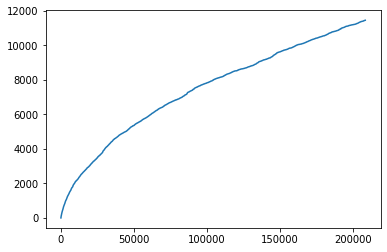

In [164]:
plt.plot(all_words_count, new_words_count)

### but when we apply a logarithm. the graph gets almost linear. see:

line equation: Y = 0.5874243296368283 X + 0.9506997661359753


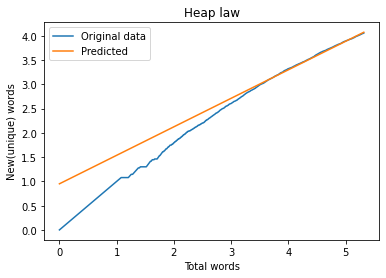

In [165]:
import matplotlib.pyplot as plt
import math
X_cordinate = [math.log10(i) for i in all_words_count]
Y_cordinate = [math.log10(i) for i in new_words_count]
plt.plot(X_cordinate, Y_cordinate)
plt.title("Heap law")
plt.ylabel("New(unique) words")
plt.xlabel("Total words")
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(X_cordinate, Y_cordinate)
print(f"line equation: Y = {slope} X + {intercept}")
plt.plot(X_cordinate, [slope*x + intercept for x in X_cordinate])
plt.legend(["Original data", "Predicted"])
plt.show()


# Now the zipf law:
### First we need to sort our postings by their frequency. Now it would be easy since the operator overloadings we did

### We create and sort -descending- the array of postings by their frequency. we simply use list.sort() 

In [166]:
sorted_postings = [Posting(*posting) for posting in known_words.items()]
sorted_postings.sort(reverse=True)
print("Top 20 most frequent tokens:")
print(*sorted_postings[:20], sep='\n')


Top 20 most frequent tokens:
"the": 6287
"and": 5690
"i": 5111
"to": 4934
"of": 3760
"you": 3211
"my": 3120
"a": 3018
"that": 2664
"in": 2403
"is": 2118
"not": 2015
"for": 1926
"s": 1859
"with": 1813
"it": 1773
"me": 1769
"be": 1710
"your": 1686
"he": 1606


## First without a log:
### As you see it look useless. 

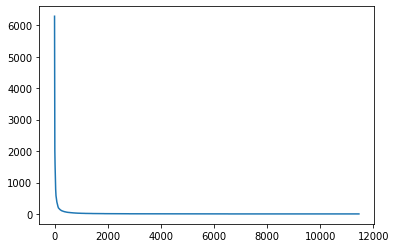

In [167]:
plt.plot(range(1, len(sorted_postings)+1), sorted_postings)

## Now we do log again to prepare the data to plot.

### Now it gets almost linear
### Then we find the best line fitting througth the data same again.

line equation: Y = -1.3158590371997116 X + 5.2295504538415365


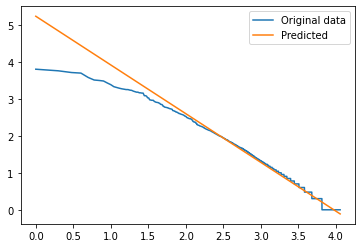

In [168]:
X_cordinate = [math.log10(i) for i in range(1, len(sorted_postings)+1)]
Y_cordinate = [math.log10(posting) for posting in sorted_postings]
plt.plot(X_cordinate, Y_cordinate)
slope, intercept, r, p, std_err = stats.linregress(X_cordinate, Y_cordinate)
print(f"line equation: Y = {slope} X + {intercept}")
plt.plot(X_cordinate, [slope*x + intercept for x in X_cordinate])
plt.legend(["Original data", "Predicted"])
plt.show()

# Conclusion:

#### We read and indexed a huge file, mined the tokens and terms. Then checked relation between the unique and total word (Heap law) and relation between rank and frequecy (zipf law) of them.
#### We saw that without applying a logarithm they may be useless specially in zipf. To normalize and get them usable we should apply a logarithm.
#### When we did so, we saw that the in Heap case relation got so close to linear. also zipf got more usable. 
#### In zipf case without logarithm it was a complete mess and not usable or reliable (in a situation that we want to rank some documents by their words frequncy. we should consider applying a log on it)
## 


#### we can also conclude from Heap law that the relation between logarithm of number of unique words and total words is so close to linear while without it. as we progress througth the text the growth of unique words falls [almost logarithmic] relative to total number of words. it makes more scense when we apply a logarithm and it gets nearly linear.
#### and by the zipf law we can conclude that the relation between logarithm of rank and frequency of words is so close to o even more than exponential. it makes more scense when we apply logarithm it gets close to or more than linear[with negative slope].